In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# This file is part of the panco project.
# https://github.com/Huawei-Paris-Research-Center/Panco


In [2]:
from IPython.display import clear_output

import numpy as np
import matplotlib. pyplot as plt

from panco.descriptor.curves import RateLatency, TokenBucket
from panco.descriptor.flow import Flow
from panco.descriptor.server import Server
from panco.descriptor.network import Network

from panco.fifo.tfaLP import TfaLP
from panco.fifo.admTFA import AdmTfa
from panco.fifo.fifoLP import FifoLP

# from PyLPbounds.Blind.blindLP import BlindLP

# Ring 1: one long flow per server

In [3]:
M = 4
PACKET = 1000
SIGMA_ES = M *  PACKET
PERIOD = 0.0005
RHO_ES = M *  PACKET / PERIOD
print(RHO_ES)
ARRIVAL_CURVE = [TokenBucket(SIGMA_ES, RHO_ES)]

SIGMA = PACKET
U = 1
RHO =  4e7 
SHAPING = [TokenBucket(SIGMA, RHO)]


8000000.0


In [4]:
N = 20
PATHS = [list(range(i, N)) + list(range(i)) for i in range(N)]

FLOWS = [Flow(ARRIVAL_CURVE, p) for p in PATHS]

In [7]:
TAB_U = [1 + i * 0.05 for i in range(100)] 

TAB_R = [1e9,  2e9, 2.5e9, 3e9, 4e9, 5e9]
tab_no_sh = []
tab_sh = []
tab_only_sh = []
for u in TAB_U:
    print(u)
    RATE = 10 ** 9
    LATENCY = 5 * 10** (-6)
    RHO = u * RHO_ES  
    SHAPING = [TokenBucket(SIGMA, RHO)]
    FLOWS = [Flow(ARRIVAL_CURVE, p) for p in PATHS]
    SERVER = Server([RateLatency(RATE, LATENCY)], [TokenBucket(PACKET, RATE)])
    NETWORK = Network(N * [SERVER], FLOWS)
    # print(NETWORK.load)
    sh_delay = (SIGMA_ES - SIGMA) / RHO
    tfa_no_sh = AdmTfa(NETWORK).delay(0)
    tab_no_sh += [tfa_no_sh]
    FLOWS = [Flow(SHAPING, p) for p in PATHS]
    NETWORK = Network(N * [SERVER], FLOWS)
    tfa_sh_only = AdmTfa(NETWORK).delay(0)
    tab_only_sh += [tfa_sh_only]
    AS_SH = [TokenBucket(SIGMA_ES, RHO_ES)] + SHAPING
    FLOWS = [Flow(AS_SH, p) for p in PATHS]
    NETWORK = Network(N * [SERVER], FLOWS)
    tfa_sh = AdmTfa(NETWORK).delay(0)
    tab_sh += [tfa_sh]
clear_output() 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


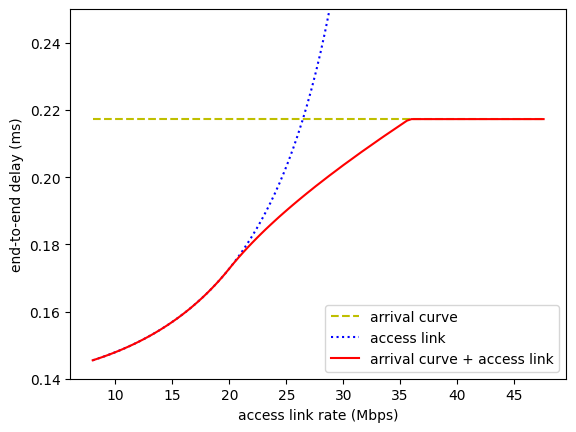

In [8]:
plt.plot([u * RHO_ES / 1e6 for u in TAB_U], [t * 1e3 for t in tab_no_sh], 'y--' ,label='arrival curve')
plt.plot([u * RHO_ES / 1e6 for u in TAB_U], [t * 1e3 for t in tab_only_sh], 'b:', label='access link')
plt.plot([u * RHO_ES / 1e6 for u in TAB_U], [t * 1e3 for t in tab_sh], 'r', label='arrival curve + access link')
plt.xlabel('access link rate (Mbps)')
plt.ylabel('end-to-end delay (ms)')
plt.legend(loc='lower right')
plt.ylim([0.14, 0.25])
plt.savefig('ring1f.eps', format='eps')
plt.show()
